<a href="https://colab.research.google.com/github/2019mohamed/Node2Img/blob/main/PersistenceImagerForNodeFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install giotto-tda
! pip install Ripser
! pip install persim

     |████████████████████████████████| 1.5MB 4.9MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
     |████████████████████████████████| 28.5MB 80kB/s 
     |████████████████████████████████| 3.2MB 32.4MB/s 
     |████████████████████████████████| 19.1MB 1.6MB/s 
     |████████████████████████████████| 409kB 22.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 71kB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparin

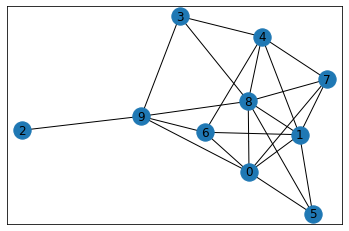

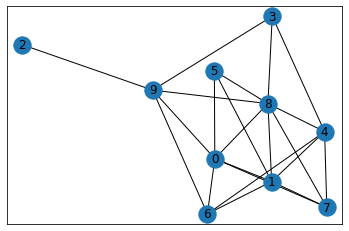

/usr/local/lib/python3.7/dist-packages/gtda/graphs/geodesic_distance.py:106: UserWarning:

Methods 'auto' and 'FW' are not supported when some edge weights are zero. Using 'D' instead for graph 0.

/usr/local/lib/python3.7/dist-packages/gtda/homology/simplicial.py:236: DataDimensionalityWarning:

All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.

/usr/local/lib/python3.7/dist-packages/gtda/homology/simplicial.py:303: DataDimensionalityWarning:

All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.



<IPython.core.display.Javascript object>

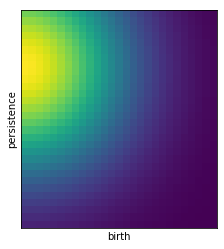

In [7]:
from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.plotting import plot_point_cloud
from ripser import ripser
from ripser import Rips
from persim import plot_diagrams
from persim import PersistenceImager
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


def Node2Img (g):
  A = nx.linalg.graphmatrix.adjacency_matrix(g).todense()
  A = np.array(A , dtype = bool)

  Ds = GraphGeodesicDistance().fit_transform([A])[0]

  VR = VietorisRipsPersistence()
  Xt = VR.fit_transform([Ds])[0]
  diagrams = plot_diagram(Xt)

  app = JupyterDash(__name__)
  app.layout = html.Div([dcc.Graph(figure=diagrams)])
  app.run_server(mode='inline')

  pimgr = PersistenceImager(pixel_size=0.1)
  out = pimgr.fit_transform(Xt[:,:2] , skew =True)
  pimgr.plot_image(out)

n = 10
hops = 2
G = nx.generators.random_graphs.fast_gnp_random_graph(n , 0.5)
nx.draw_networkx(G)
plt.show()

g = nx.generators.ego.ego_graph(G , 0 , hops)
nx.draw_networkx(g)
plt.show()
Node2Img(g)






In [2]:
#pip install plotly
!pip install jupyter-dash



     |████████████████████████████████| 81kB 4.1MB/s 
     |████████████████████████████████| 1.0MB 11.4MB/s 
     |████████████████████████████████| 3.5MB 35.1MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 1.8MB 33.8MB/s 
     |████████████████████████████████| 358kB 33.0MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85845 sha256=78be10ba2c5be4c5057206ad79a4c49d17f8777741e57f2e47929af07807e7f3
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014873 sha256=49f856c5265f414c0b48c635e1c13be4b893d305c363be3e5932099ec04cde17
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540992 sha256=683d8675d632b3ee61f6cb